In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import sparse

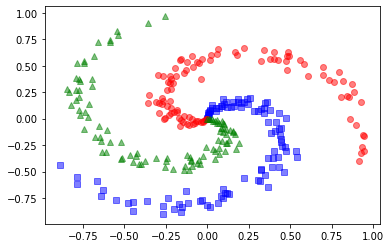

In [24]:
N = 100
d0 = 2
C = 3
X = np.zeros((N*C, d0))
y = np.zeros(N*C, dtype='uint8')

for j in range(C):
    ix = range(N*j, N*(j + 1))
    r = np.linspace(0, 1, N)
    theta = np.linspace(j*4, (j + 1)*4, N) + np.random.randn(N)*0.2
    X[ix, :] = np.c_[r*np.sin(theta), r*np.cos(theta)]
    y[ix] = j

plt.plot(X[:N, 0], X[:N, 1], 'bs', alpha=0.5);
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'ro', alpha=0.5);
plt.plot(X[2*N:, 0], X[2*N:, 1], 'g^', alpha=0.5);
plt.show()

In [39]:
def softmax_stable(Z):
    # Z.shape(N, d_l)
    e_Z = np.exp(Z - np.amax(Z, axis=1, keepdims=True))
    A = e_Z/np.sum(e_Z, axis=1, keepdims=True)
    return A
    
def convert_labels(y, C):
    """"
    Chuyển ma trận nhãn từ dạng số sang dạng one-hot
    VD: y = [0, 2, 1, 0]
    -> y = [[1, 0, 0],
            [0, 0, 1],
            [0, 1, 0],
            [1, 0, 0]]
    """
    Y = sparse.coo_matrix((np.ones_like(y), (np.arange(len(y)), y)), shape=(len(y), C)).toarray()
    return Y

def cost(Y, Yhat):
    # Y.shape = (N, C)
    return -np.sum(Y*np.log(Yhat))/Y.shape[0]

d0 = 2
d1 = 100
d2 = 3

W1 = 0.01*np.random.randn(d0, d1)
b1 = np.zeros((1, d1))
W2 = 0.01*np.random.randn(d1, d2)
b2 = np.zeros((1, d2))

Y = convert_labels(y, d2)
eta = 1

for i in range(10000):
    # Feedforward
    Z1 = X.dot(W1) + b1
    A1 = np.maximum(Z1, 0) # ReLU
    Z2 = A1.dot(W2) + b2
    A2 = softmax_stable(Z2)
    
    # Print loss after each 1000 iterations
    if i %1000 == 0:
        loss = cost(Y, A2)
        print("Iter %d, loss: %f" %(i, loss))
    
    # Backpropagation
    E2 = (A2 - Y)/N
    dW2 = A1.T.dot(E2)
    db2 = np.sum(E2, axis=0, keepdims=True)
    E1 = E2.dot(W2.T)
    E1[Z1 <=0] = 0 # Gradient of ReLU
    dW1 = X.T.dot(E1)
    db1 = np.sum(E1, axis=0, keepdims=True)
    
    # Update
    W1 -= eta*dW1
    b1 -= eta*db1
    W2 -= eta*dW2
    b2 -= eta*db2
    
    Z1 = X.dot(W1) + b1
    A1 = np.maximum(Z1, 0)
    Z2 = A1.dot(W2) +b2
    y_pred = np.argmax(Z2, axis=1)

print('Accuracy: %f %%' %(100*np.mean(y_pred == y)))
print('Number of misclassified points:', len(y) - np.sum(y_pred ==y))

Iter 0, loss: 1.098705
Iter 1000, loss: 0.033745
Iter 2000, loss: 0.025164
Iter 3000, loss: 0.021354
Iter 4000, loss: 0.019087
Iter 5000, loss: 0.018097
Iter 6000, loss: 0.017585
Iter 7000, loss: 0.017033
Iter 8000, loss: 0.016520
Iter 9000, loss: 0.015437
Accuracy: 99.333333 %
Number of misclassified points: 2


In [57]:
# Sklearn
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha= 0.1, hidden_layer_sizes=(100))
clf.fit(X, y)
y_pred = clf.predict(X)
print('Accuracy: %f %%' %(100*np.mean(y_pred == y)))

Accuracy: 99.333333 %


c:\users\httev\appdata\local\programs\python\python36\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
